# Importing required modules

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Settings to produce nice plots in a Jupyter notebook
plt.style.use('fivethirtyeight')
%matplotlib inline

# Reading in the data

In [3]:
stock_data = pd.read_csv('static/data/stock_data.csv', parse_dates=["Date"], index_col=['Date']).dropna()
benchmark_data = pd.read_csv('static/data/benchmark_data.csv', parse_dates=["Date"], index_col=['Date']).dropna()

# Inspect Data

In [14]:
# Display summary for stock_data
print('Stocks\n')
stock_data.info()
# Display summary for benchmark_data
print('\nBenchmarks\n')
benchmark_data.info()

Stocks

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2016-01-04 to 2016-12-30
Data columns (total 2 columns):
Amazon      252 non-null float64
Facebook    252 non-null float64
dtypes: float64(2)
memory usage: 5.9 KB

Benchmarks

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2016-01-04 to 2016-12-30
Data columns (total 1 columns):
S&P 500    252 non-null float64
dtypes: float64(1)
memory usage: 3.9 KB


In [48]:
frames = [stock_data.describe(), benchmark_data.describe()]

In [50]:
stock_summary = pd.concat(frames, axis=1)
stock_summary

,Amazon,Facebook,S&P 500
count,252.000000,252.000000,252.000000
mean,699.523135,117.035873,2094.651310
std,92.362312,8.899858,101.427615
min,482.070007,94.160004,1829.080000
25%,606.929993,112.202499,2047.060000
50%,727.875000,117.765000,2104.105000
75%,767.882492,123.902503,2169.075000
max,844.359985,133.279999,2271.720000


# Visualize Stock Data

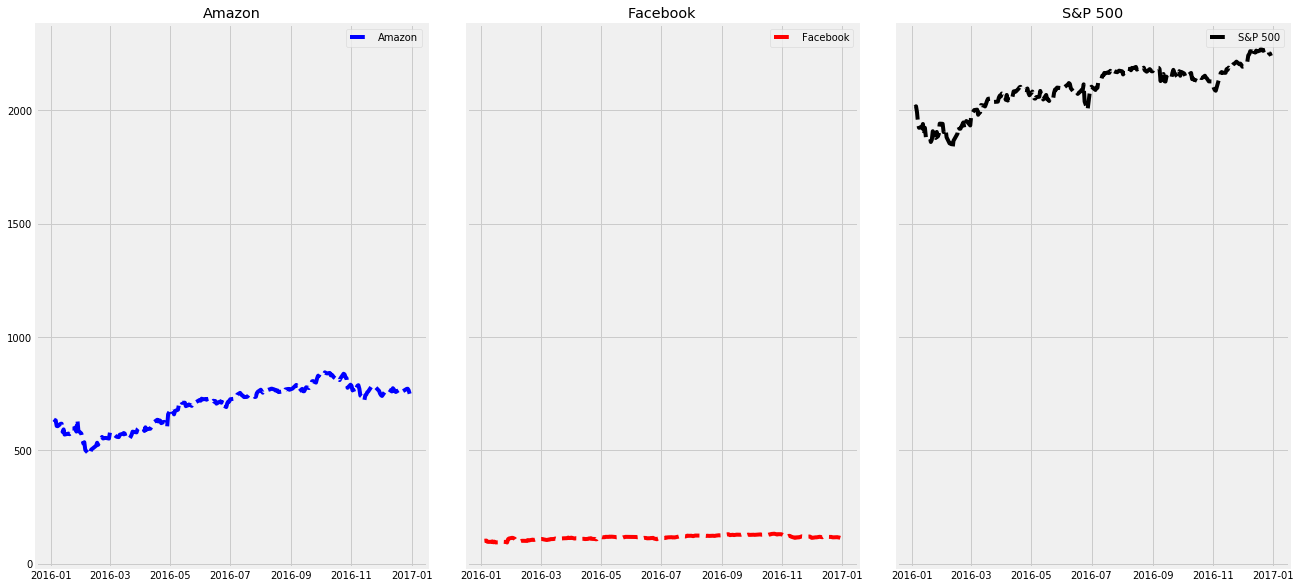

In [45]:
fig, axes = plt.subplots(1,3, figsize=(20,10), sharey=True)
fig.subplots_adjust(wspace=0.1, hspace=0.1)

# The first subplot (row 1, col 1)
axes[0].plot(stock_data['Amazon'], 'k--', color='blue', label="Amazon")
axes[0].legend(loc="best")
axes[0].set_title("Amazon")

# The second subplot (ro1, col 2)
axes[1].plot(stock_data['Facebook'], 'k--', color='red', label="Facebook")
axes[1].legend(loc="best")
axes[1].set_title("Facebook")

# The third subplot (ro1, col 3)
axes[2].plot(benchmark_data['S&P 500'], 'k--', color='black', label="S&P 500")
axes[2].legend(loc="best")
axes[2].set_title("S&P 500")

plt.show()

# Returns

In [63]:
# calculate daily stock_data returns
stock_returns = stock_data.pct_change()

# calculate daily benchmark_data returns
sp_returns = benchmark_data['S&P 500'].pct_change()

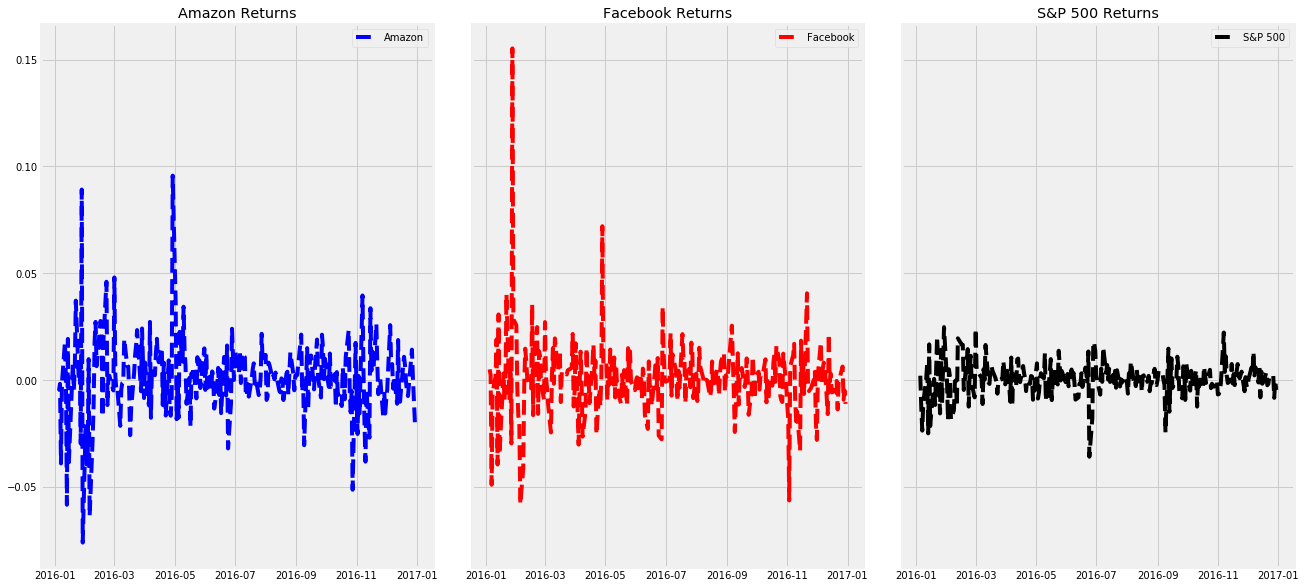

In [65]:
fig, axes = plt.subplots(1,3, figsize=(20,10), sharey=True)
fig.subplots_adjust(wspace=0.1, hspace=0.1)

# The first subplot (row 1, col 1)
axes[0].plot(stock_returns['Amazon'], 'k--', color='blue', label="Amazon")
axes[0].legend(loc="best")
axes[0].set_title("Amazon Returns")

# The second subplot (ro1, col 2)
axes[1].plot(stock_returns['Facebook'], 'k--', color='red', label="Facebook")
axes[1].legend(loc="best")
axes[1].set_title("Facebook Returns")

# The third subplot (ro1, col 3)
axes[2].plot(sp_returns, 'k--', color='black', label="S&P 500")
axes[2].legend(loc="best")
axes[2].set_title("S&P 500 Returns")

plt.show()

Calculating Excess Returns for Amazon and Facebook vs. S&P 500
<p>Next, we need to calculate the relative performance of stocks vs. the S&amp;P 500 benchmark. This is calculated as the difference in returns between <code>stock_returns</code> and <code>sp_returns</code> for each day.</p>

In [66]:
# calculate the difference in daily returns
excess_returns = stock_returns.sub(sp_returns, axis=0)

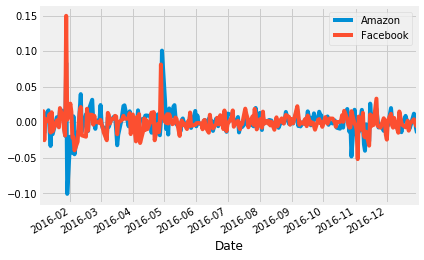

In [68]:
excess_returns.plot()
plt.show()